# EDA and preprocessing

In [1]:
#Importing libraries for EDA and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 160)
pd.set_option('display.max_colwidth', 30)

In [2]:
#Loading striker df from notebook 01
striker_df = pd.read_csv("/Users/dan/PycharmProjects/Arsenal-Striker-Scouting/data/striker_df.csv")
print(striker_df.head())

   Unnamed: 0             name position   nation   age         club              league  mins_played  ninety_mins_played  goals_scored  penalty_goals  \
0           1    Abdallah Sima    FW,MF   sn SEN  23.0        Brest          fr Ligue 1         1238                13.8             7              0   
1           2  Abde Ezzalzouli    FW,MF   ma MAR  23.0        Betis          es La Liga         1984                22.0             2              0   
2           9        Abel Ruiz       FW   es ESP  25.0       Girona          es La Liga         1346                15.0             4              1   
3          10   Adam Armstrong    FW,MF  eng ENG  28.0  Southampton  eng Premier League         1248                13.9             2              0   
4          11      Adam Hložek    FW,MF   cz CZE  22.0   Hoffenheim       de Bundesliga         1871                20.8             8              0   

   non_pen_exp_goals  exp_goals  assists  exp_assists  total_shots  shots_on_targ

### Handling missing values

First, I will deal with missing values revealed in the previous notebook (01 data extraction and filtering).

In [3]:
#Creating an explicit copy of the df to avoid warnings
striker_df = striker_df.copy()

#Calculating missing values where applicable
striker_df.loc[:, "goals_per_shot"] = striker_df["goals_scored"] / striker_df["total_shots"]
striker_df.loc[:, "goals_per_sot"] = striker_df["goals_scored"] / striker_df["shots_on_target"]
striker_df.loc[:, "shot_on_target_perc"] = (striker_df["shots_on_target"] / striker_df["total_shots"]) * 100
striker_df.loc[:, "aerial_duel_win_perc"] = (striker_df["aerial_duels_won"] / (striker_df["aerial_duels_won"] + striker_df["aerial_duels_lost"])) * 100

#Filling remaining missing values with the median
median_values = striker_df.median(numeric_only=True)
striker_df.fillna(median_values, inplace=True)

#Dropping rows where calculated metrics are still NaN
essential_metrics = ["goals_per_shot", "goals_per_sot", "shot_on_target_perc", "aerial_duel_win_perc"]
striker_df.dropna(subset=essential_metrics, inplace=True)

In [4]:
#Checking that all nulls have been handled
print(striker_df.isnull().sum())

Unnamed: 0                    0
name                          0
position                      0
nation                        0
age                           0
club                          0
league                        0
mins_played                   0
ninety_mins_played            0
goals_scored                  0
penalty_goals                 0
non_pen_exp_goals             0
exp_goals                     0
assists                       0
exp_assists                   0
total_shots                   0
shots_on_target               0
goals_per_shot                0
goals_per_sot                 0
shot_on_target_perc           0
avg_shot_distance             0
key_passes                    0
shot_creation_per_90          0
goal_creation_per_90          0
pass_completion_perc          0
progressive_carries           0
total_carries                 0
total_touches                 0
touches_in_attacking_third    0
touches_in_pen                0
progressive_runs              0
times_di

In [5]:
#Dropping unnamed column
striker_df = striker_df.drop(columns=["Unnamed: 0"])

In [6]:
#Checking shape
striker_df.shape

(493, 37)

We are left with 493 players to evaluate as part of our scouting project.

### Feature engineering

In [7]:
#Creating additional columns for goal metrics
striker_df.loc[:, "goals_per_ninety"] = striker_df["goals_scored"] / striker_df["ninety_mins_played"]
striker_df.loc[:, "exp_goals_per_ninety"] = striker_df["exp_goals"] / striker_df["ninety_mins_played"]
striker_df.loc[:, "goals_minus_exp_goals"] = striker_df["goals_scored"] - striker_df["exp_goals"]

In [8]:
#Checking for nulls in the new features
print(striker_df[["goals_per_ninety", "exp_goals_per_ninety", "goals_minus_exp_goals"]].isnull().sum())

goals_per_ninety         0
exp_goals_per_ninety     0
goals_minus_exp_goals    0
dtype: int64


In [9]:
#Checking mid-points and variance
striker_df.describe(percentiles=[0.01, 0.05, 0.95, 0.99])

,age,mins_played,ninety_mins_played,goals_scored,penalty_goals,non_pen_exp_goals,exp_goals,assists,exp_assists,total_shots,shots_on_target,goals_per_shot,goals_per_sot,shot_on_target_perc,avg_shot_distance,key_passes,shot_creation_per_90,goal_creation_per_90,pass_completion_perc,progressive_carries,total_carries,total_touches,touches_in_attacking_third,touches_in_pen,progressive_runs,times_dispossessed,passes_received,aerial_duels_won,aerial_duels_lost,aerial_duel_win_perc,tackles,tackles_and_interceptions,goals_per_ninety,exp_goals_per_ninety,goals_minus_exp_goals
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,25.929006,1796.117647,19.954564,5.961460,0.590264,5.070556,5.660376,3.164300,3.050126,43.446247,16.168357,0.127118,0.348530,36.099541,16.555060,26.740365,2.983606,0.351304,72.917643,50.817444,497.332657,847.937120,5.545639,81.823529,129.809331,28.636917,602.614604,24.667343,13.377282,55.572729,23.462475,31.488844,0.285289,0.275141,0.301084
std,3.704676,606.941240,6.744899,5.121346,1.310707,3.696188,4.395444,2.670865,2.173546,24.123742,10.361654,0.073575,0.192162,9.776348,3.200406,15.949027,1.124727,0.199610,6.935067,35.993269,241.750793,378.337014,3.615185,45.769963,68.729972,14.981425,281.808254,26.221362,8.702843,25.683813,14.274071,18.738855,0.204869,0.169559,2.180246
min,17.000000,900.000000,10.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,5.000000,0.000000,0.000000,0.000000,0.000000,10.100000,3.000000,0.707018,0.000000,47.511688,2.000000,96.000000,256.000000,0.000000,8.000000,27.000000,3.000000,156.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.009259,-6.600000
1%,19.000000,921.000000,10.200000,0.000000,0.000000,0.392000,0.392000,0.000000,0.200000,7.000000,1.000000,0.000000,0.000000,9.090909,10.700000,5.000000,1.060400,0.000000,56.560000,5.000000,142.200000,305.680000,0.000000,14.000000,34.840000,6.000000,204.840000,0.920000,1.000000,4.000000,2.920000,4.000000,0.000000,0.022915,-4.008000
5%,20.000000,964.600000,10.700000,0.000000,0.000000,0.960000,0.960000,0.000000,0.600000,14.600000,3.000000,0.000000,0.000000,20.000000,11.700000,8.000000,1.346000,0.080000,61.540000,9.000000,193.800000,367.800000,1.000000,28.000000,46.600000,9.600000,249.800000,3.000000,3.000000,14.494774,6.000000,8.600000,0.000000,0.066510,-2.800000
50%,25.000000,1730.000000,19.200000,5.000000,0.000000,4.000000,4.200000,3.000000,2.600000,38.000000,14.000000,0.120000,0.333333,36.206897,16.600000,23.000000,2.860000,0.320000,73.300000,40.000000,450.000000,788.000000,5.000000,72.000000,115.000000,26.000000,552.000000,15.000000,12.000000,54.545455,20.000000,27.000000,0.256410,0.239583,0.100000
95%,33.000000,2842.400000,31.600000,16.000000,3.000000,12.000000,13.800000,8.000000,7.180000,91.800000,36.000000,0.256703,0.642857,51.612903,22.000000,57.000000,5.102000,0.724000,83.740000,124.800000,941.800000,1570.200000,12.000000,162.400000,256.000000,55.000000,1142.400000,81.200000,30.000000,93.589744,49.400000,66.400000,0.695652,0.614199,4.340000
99%,36.000000,3132.120000,34.764000,23.160000,6.080000,18.508000,21.632000,11.080000,11.148000,121.240000,49.000000,0.325667,0.840000,59.163636,24.332000,82.400000,5.924000,0.941600,87.516000,150.320000,1214.240000,1951.480000,17.000000,199.000000,352.840000,74.000000,1447.320000,133.160000,40.240000,97.381868,66.000000,86.080000,0.956192,0.804180,6.416000
max,38.000000,3414.000000,37.900000,31.000000,9.000000,23.900000,27.100000,18.000000,14.200000,152.000000,75.000000,0.375000,1.666667,62.500000,28.600000,95.000000,6.510000,1.250000,90.000000,213.000000,1485.000000,2096.000000,27.000000,356.000000,488.000000,94.000000,1723.000000,167.000000,

Observation: There are a lot of players that have not scored a goal. Seeing as I am searching for a goalscorer, I will filter out the bottom 50% (goals_scored <=5).

In [10]:
filtered_striker_df = striker_df[striker_df["goals_scored"] > 5]
print(filtered_striker_df.shape)

(216, 40)


We are now left with 216 forwards to observe.

### Univariant analysis

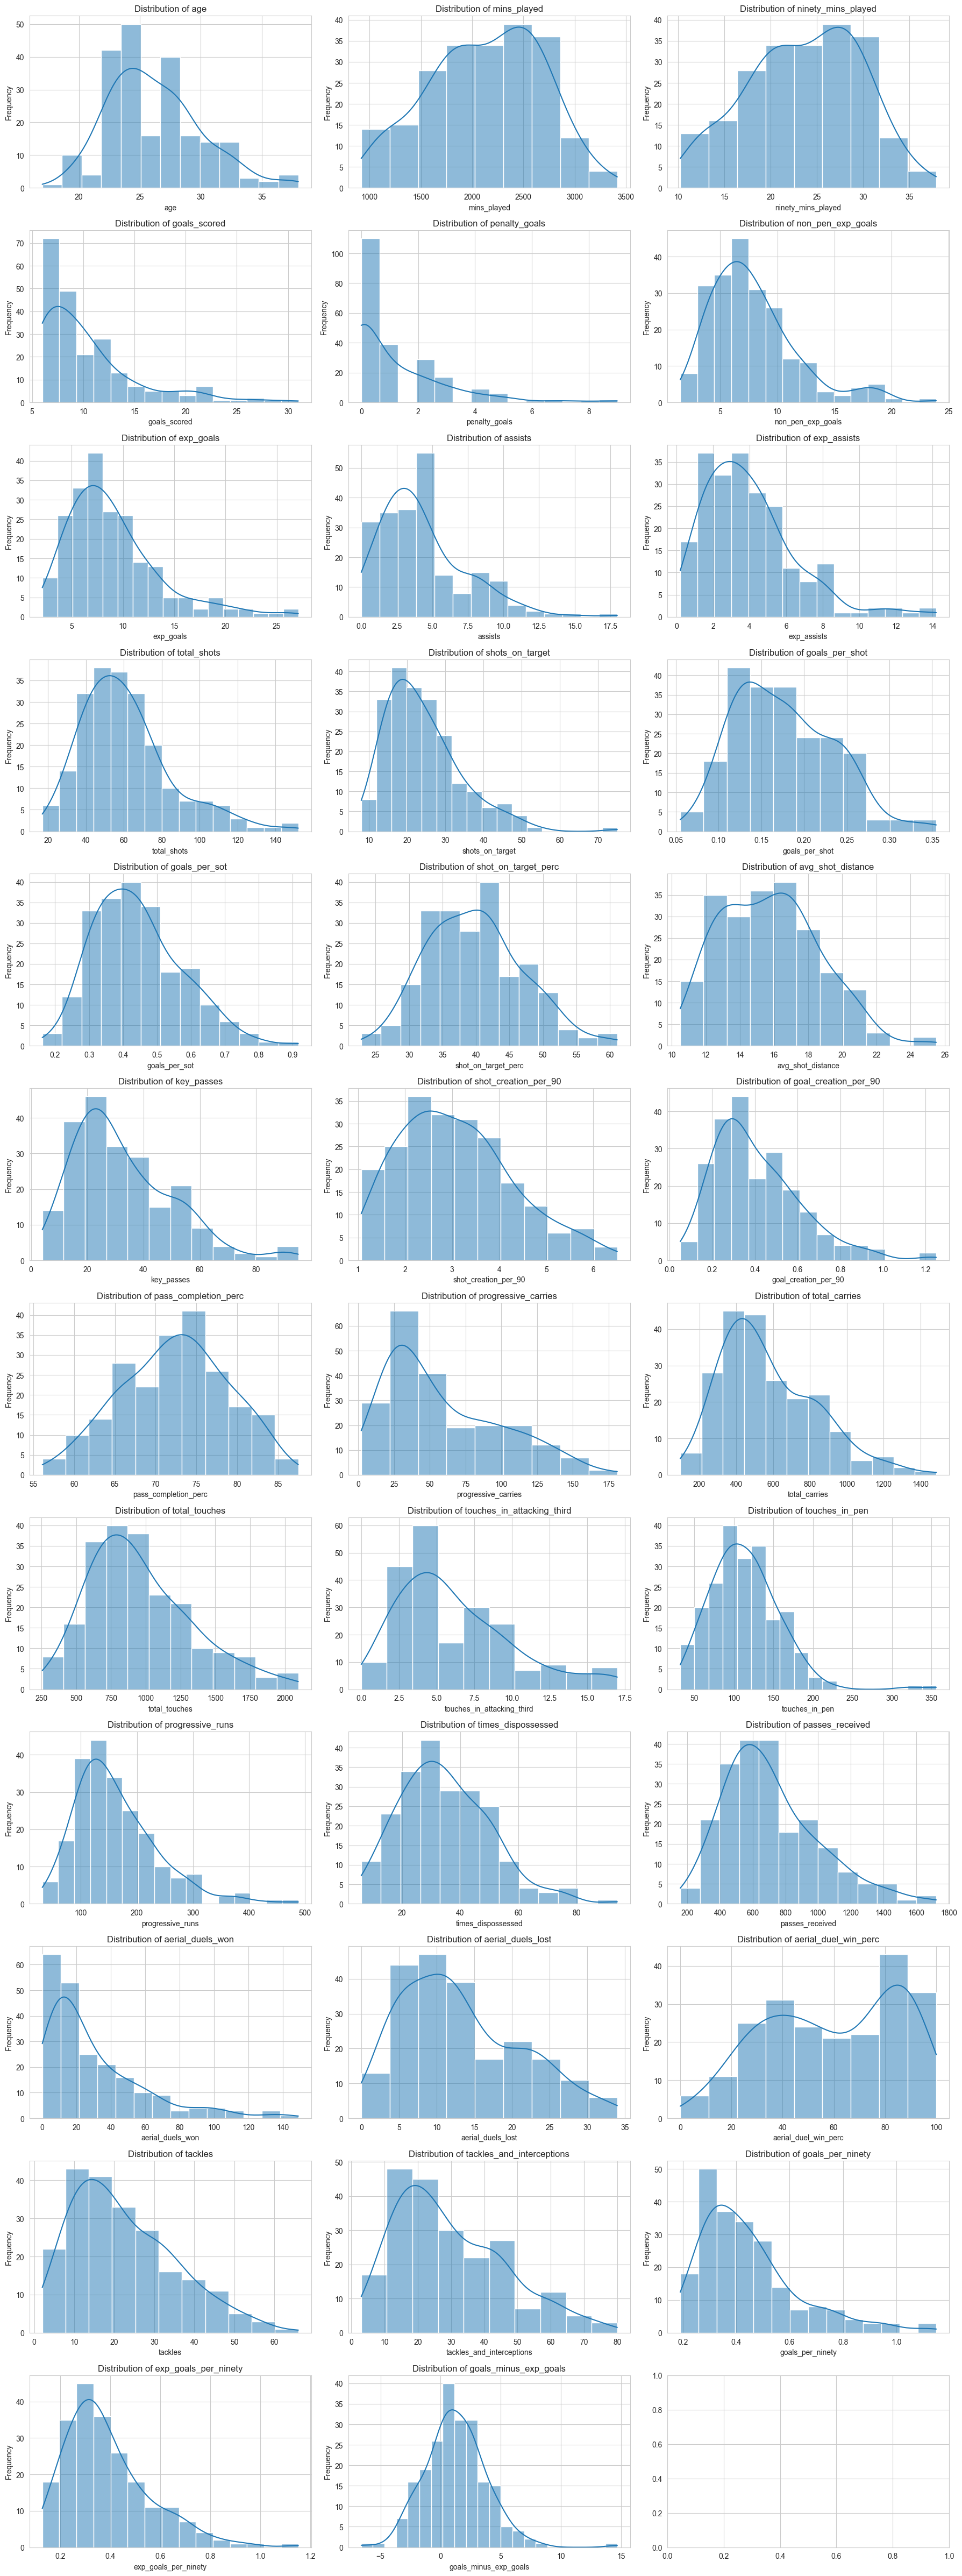

In [11]:
#Checking distributions for outliers and anomalies
#Defining numerical features
numerical_features = filtered_striker_df.select_dtypes(include=["number"]).columns

sns.set_style("whitegrid")
sns.color_palette("coolwarm")

#Defining number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

#Creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(filtered_striker_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Observation: potential outliers in:

- progressive_runs
- touches_in_pen
- aerial_duels_won
- shots_on_target

In [12]:
#Checking categorical distributions
categorical_features = filtered_striker_df.select_dtypes(include=["object"]).columns

for feature in categorical_features:
    print(f"Value counts for {feature}:")
    print(filtered_striker_df[feature].value_counts())
    print("\n")

Value counts for name:
name
Abdallah Sima      1
Matthis Abline     1
Luis Henrique      1
M'Bala Nzola       1
Marco Grüll        1
                  ..
Ferrán Torres      1
Florian Thauvin    1
Florian Wirtz      1
Fábio Silva        1
Álex Berenguer     1
Name: count, Length: 216, dtype: int64


Value counts for position:
position
FW       112
FW,MF     68
MF,FW     32
DF,FW      3
FW,DF      1
Name: count, dtype: int64


Value counts for nation:
nation
fr FRA     28
es ESP     22
de GER     19
eng ENG    19
it ITA     13
br BRA     10
ar ARG      8
be BEL      7
sn SEN      5
pt POR      5
nl NED      5
jp JPN      5
se SWE      5
dk DEN      4
ng NGA      4
no NOR      4
dz ALG      3
ge GEO      3
kr KOR      2
ma MAR      2
ca CAN      2
eg EGY      2
cz CZE      2
rs SRB      2
gn GUI      2
wls WAL     2
ch SUI      2
cd COD      2
gh GHA      2
ci CIV      2
hr CRO      2
me MNE      1
mx MEX      1
at AUT      1
tr TUR      1
ao ANG      1
xk KVX      1
co COL      1
pl POL 

In [13]:
#Checking top goalscorers
top_goal = filtered_striker_df["goals_scored"] > 13 #top 95th percentile
print(filtered_striker_df.loc[top_goal, ["name","club", "league", "goals_scored"]].sort_values(by=['goals_scored'], ascending=False))

                     name                           club                         league  goals_scored
274         Kylian Mbappé                    Real Madrid                     es La Liga            31
341         Mohamed Salah                      Liverpool             eng Premier League            29
407    Robert Lewandowski                      Barcelona                     es La Liga            27
196            Harry Kane                  Bayern Munich                  de Bundesliga            26
318         Mateo Retegui                       Atalanta                     it Serie A            25
27         Alexander Isak                  Newcastle Utd             eng Premier League            23
370         Omar Marmoush  Manchester City, Eint Fran...  eng Premier League, de Bun...            22
154        Erling Haaland                Manchester City             eng Premier League            22
381         Patrik Schick                     Leverkusen                  de Bunde

In [15]:
#Checking goals vs. expected goals
ovr_goal = filtered_striker_df["goals_minus_exp_goals"] > 4.3 #top 95th percentile
print(filtered_striker_df.loc[ovr_goal, ["name","club", "goals_per_ninety", "goals_minus_exp_goals"]].sort_values(by=['goals_minus_exp_goals'], ascending=False))

                      name                           club  goals_per_ninety  goals_minus_exp_goals
370          Omar Marmoush  Manchester City, Eint Fran...          0.753425              14.680479
381          Patrik Schick                     Leverkusen          1.122995               8.300000
84            Bryan Mbeumo                      Brentford          0.527704               7.700000
36            Amine Gouiri              Marseille, Rennes          0.562771               7.039394
100             Chris Wood                Nott'ham Forest          0.607903               6.600000
319          Matheus Cunha                         Wolves          0.519031               6.400000
66             Ayoze Pérez                     Villarreal          0.867580               6.300000
318          Mateo Retegui                       Atalanta          0.943396               6.100000
196             Harry Kane                  Bayern Munich          0.981132               5.700000
65        

In [18]:
#Checking for the underachievers
und_goal = filtered_striker_df["goals_minus_exp_goals"] < -2.8 #bottom 5th percentile
print(filtered_striker_df.loc[und_goal, ["name","club", "goals_per_ninety", "goals_minus_exp_goals"]].sort_values(by=['goals_minus_exp_goals'], ascending=False))

                     name            club  goals_per_ninety  goals_minus_exp_goals
443       Takumi Minamino          Monaco          0.241935                   -2.9
150        Emanuel Emegha      Strasbourg          0.549020                   -3.0
486     Zakaria Aboukhlal        Toulouse          0.331754                   -3.2
361           Nicolás Paz            Como          0.200669                   -3.3
465  Valentín Castellanos           Lazio          0.377358                   -3.3
46        Ange-Yoan Bonny           Parma          0.213523                   -3.4
192         Gonçalo Ramos       Paris S-G          0.847458                   -3.6
81           Breel Embolo          Monaco          0.292683                   -4.8
201          Hugo Ekitike  Eint Frankfurt          0.526316                   -6.6


Observation: No Arsenal players feature in the top 95th percentile for goal scoring metrics.

### Bivariant analysis

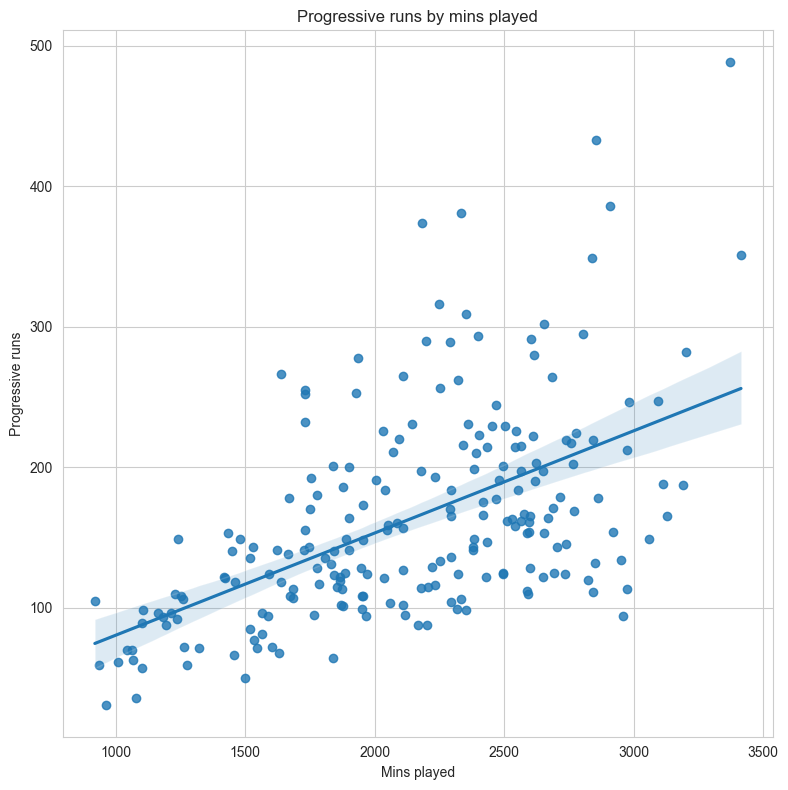

In [26]:
#Plotting progressive runs by mins played to spot anomalies
plt.figure(figsize=(8, 8))
sns.regplot(filtered_striker_df, x="mins_played", y="progressive_runs")
plt.title("Progressive runs by mins played")
plt.ylabel("Progressive runs")
plt.xlabel("Mins played")
plt.tight_layout()
plt.show()

In [27]:
#Identifying the two biggest outliers
pr_outlier = filtered_striker_df[filtered_striker_df["progressive_runs"] > 400]
print(pr_outlier["name"])

275     Lamine Yamal
341    Mohamed Salah
Name: name, dtype: object


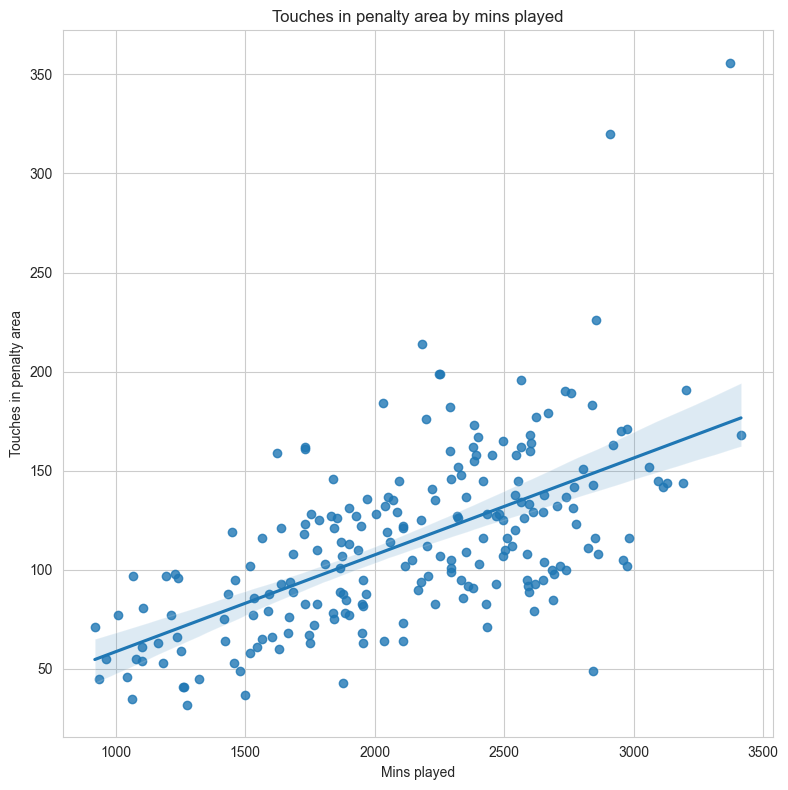

In [28]:
#Plotting touches in pen by mins played to spot anomalies
plt.figure(figsize=(8, 8))
sns.regplot(filtered_striker_df, x="mins_played", y="touches_in_pen")
plt.title("Touches in penalty area by mins played")
plt.ylabel("Touches in penalty area")
plt.xlabel("Mins played")
plt.tight_layout()
plt.show()

In [29]:
#Identifying the two biggest outliers
tip_outlier = filtered_striker_df[filtered_striker_df["touches_in_pen"] > 300]
print(tip_outlier["name"])

274    Kylian Mbappé
341    Mohamed Salah
Name: name, dtype: object


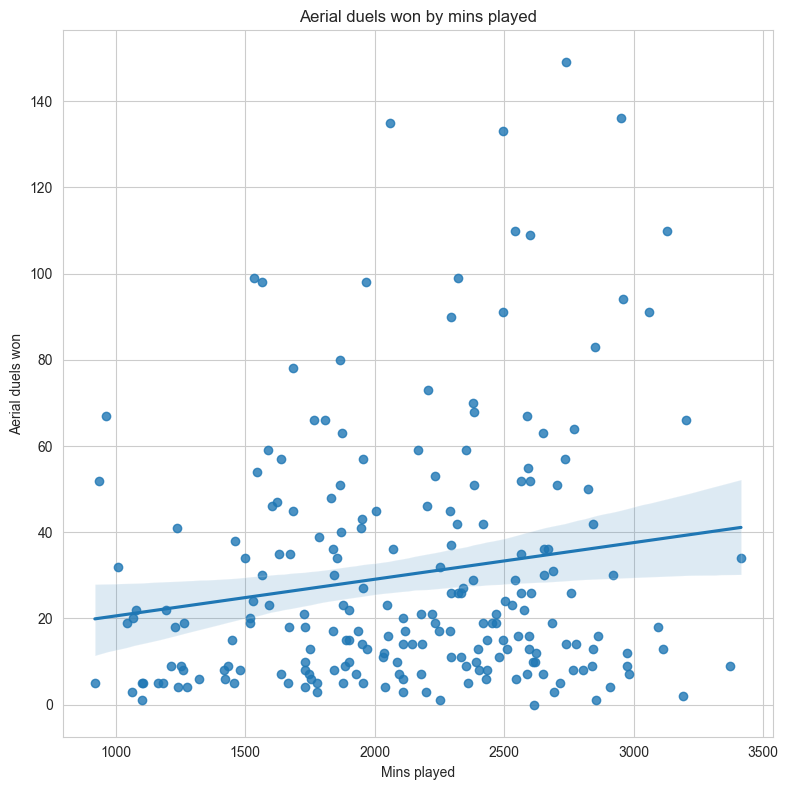

In [30]:
#Plotting aerial duels won by mins played to spot anomalies
plt.figure(figsize=(8, 8))
sns.regplot(filtered_striker_df, x="mins_played", y="aerial_duels_won")
plt.title("Aerial duels won by mins played")
plt.ylabel("Aerial duels won")
plt.xlabel("Mins played")
plt.tight_layout()
plt.show()

In [31]:
#Identifying the biggest outliers
adw_outlier = filtered_striker_df[filtered_striker_df["aerial_duels_won"] > 120]
print(adw_outlier["name"])

48        Ante Budimir
293    Ludovic Ajorque
454    Tim Kleindienst
466       Vedat Muriqi
Name: name, dtype: object


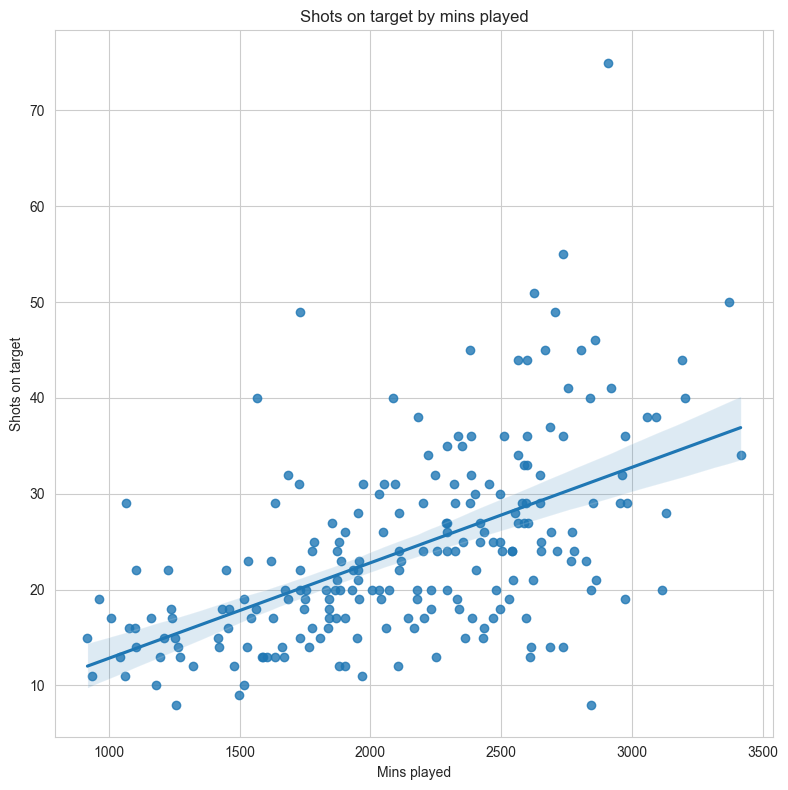

In [32]:
#Plotting shots on target by mins played to spot anomalies
plt.figure(figsize=(8, 8))
sns.regplot(filtered_striker_df, x="mins_played", y="shots_on_target")
plt.ylabel("Shots on target")
plt.xlabel("Mins played")
plt.title("Shots on target by mins played")
plt.tight_layout()
plt.show()

In [33]:
#Identifying the biggest outliers
sot_outlier = filtered_striker_df[filtered_striker_df["shots_on_target"] > 50]
print(sot_outlier["name"])

154    Erling Haaland
274     Kylian Mbappé
370     Omar Marmoush
Name: name, dtype: object


The outliers are not errors but players who excel in specific areas of the game.

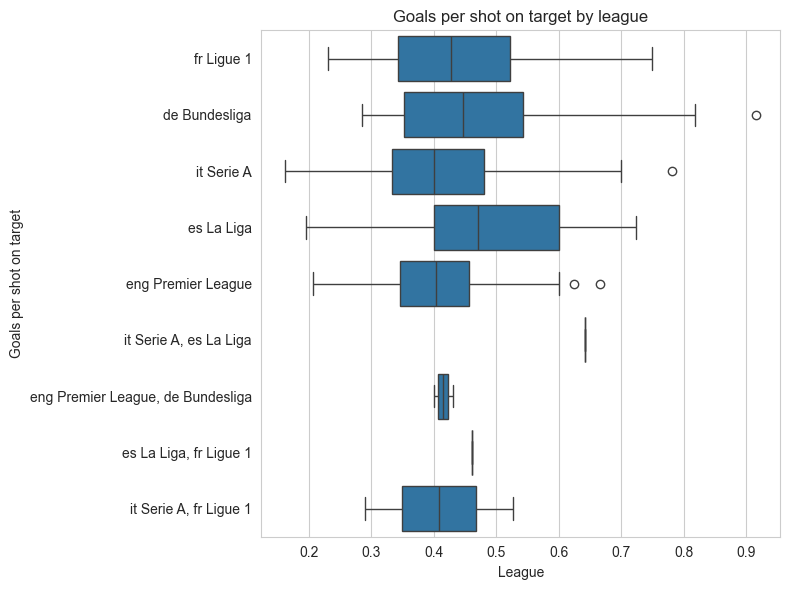

In [24]:
#Checking the distribution of goals per shot on target by league
plt.figure(figsize=(8, 6))
sns.boxplot(filtered_striker_df, x="goals_per_sot", y="league")
plt.title("Goals per shot on target by league")
plt.ylabel("Goals per shot on target")
plt.xlabel("League")
plt.tight_layout()
plt.show()

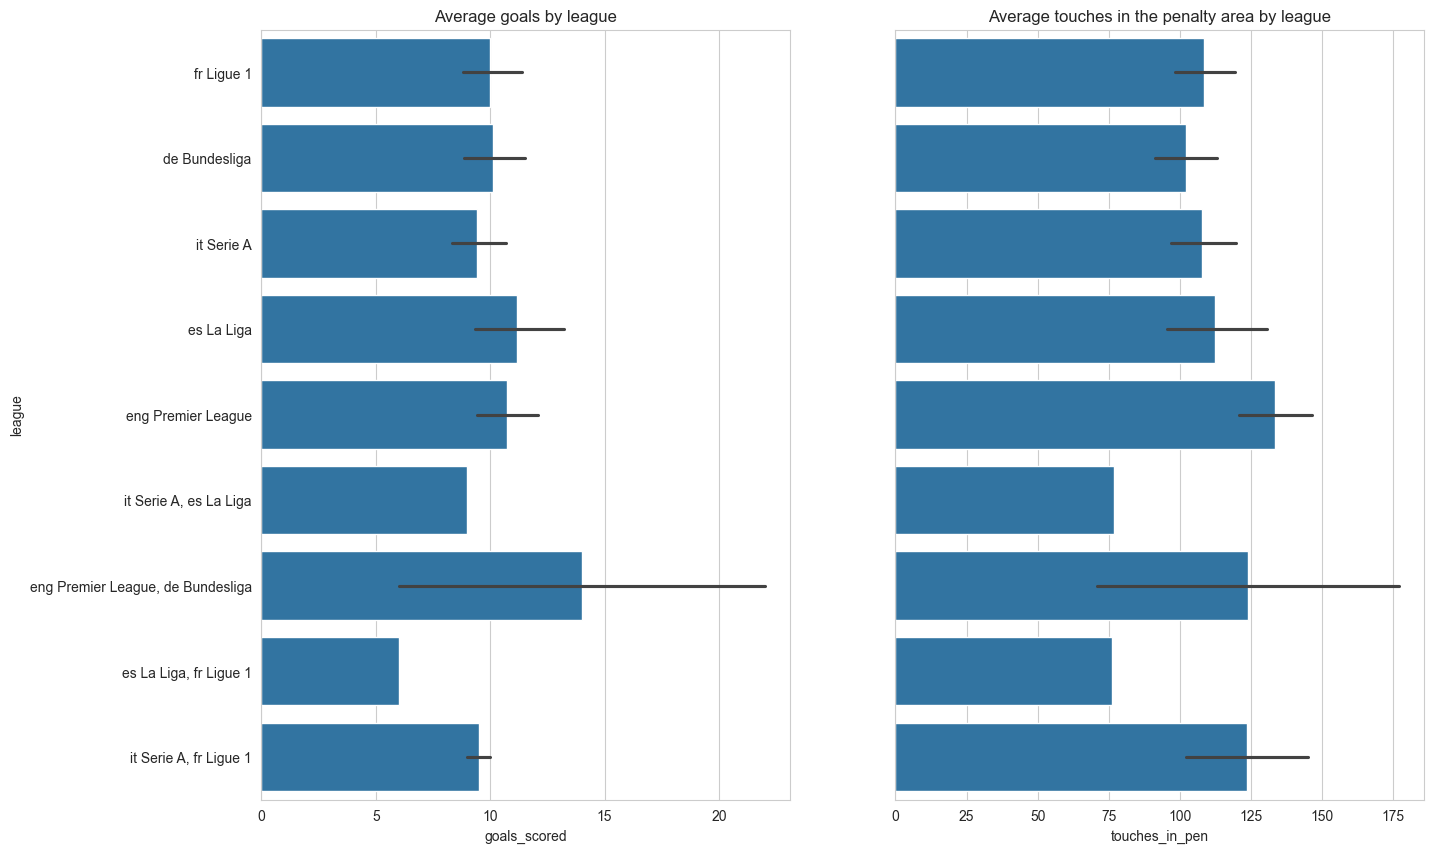

In [36]:
#Distribution of key metrics by league
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

sns.barplot(filtered_striker_df, x="goals_scored", y="league", ax=axes[0])
axes[0].set_title("Average goals by league")

sns.barplot(filtered_striker_df, x="touches_in_pen", y="league", ax=axes[1])
axes[1].set_title("Average touches in the penalty area by league")

plt.show()

In [34]:
#Creating a correlation matrix to find highly correlated features
corr_matrix = filtered_striker_df.corr(numeric_only=True)
print(corr_matrix)

                                 age  mins_played  ninety_mins_played  goals_scored  penalty_goals  non_pen_exp_goals  exp_goals   assists  exp_assists  \
age                         1.000000     0.015151            0.015181      0.188688       0.268218           0.109642   0.179204 -0.031755    -0.091051   
mins_played                 0.015151     1.000000            0.999989      0.418431       0.270365           0.428496   0.458165  0.424154     0.429918   
ninety_mins_played          0.015181     0.999989            1.000000      0.418604       0.270568           0.428793   0.458450  0.424230     0.429869   
goals_scored                0.188688     0.418431            0.418604      1.000000       0.590929           0.776945   0.848044  0.180037     0.176442   
penalty_goals               0.268218     0.270365            0.270568      0.590929       1.000000           0.286034   0.564333  0.162500     0.119595   
non_pen_exp_goals           0.109642     0.428496            0.428793 

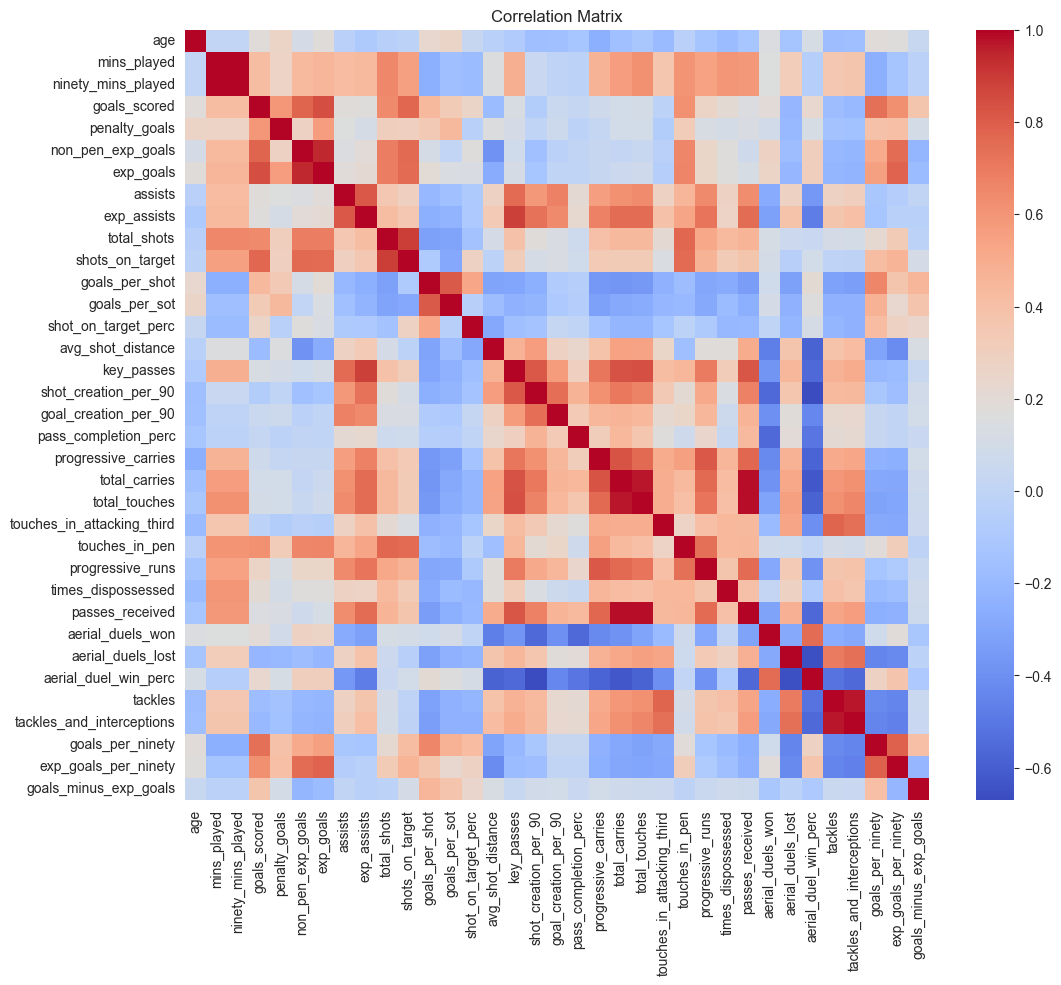

In [35]:
#Visualising correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

I have noted some high correlations that will need to be managed when modelling:

90+
- mins_played + ninety_mins_played
- exp_goals + non_pen_exp_goals

80+
- exp_goals + goals_scored
- exp_assists + assists
- exp_assists + key_passes
- total_shots + shots_on_target
- goals_per_shot + goals_per_sot
- passes_received + key_passes
- total_touches + key_passes
- total_carries + key_passes
- shot_creation_per_90 + key_passes
- exp_assists + key_passes

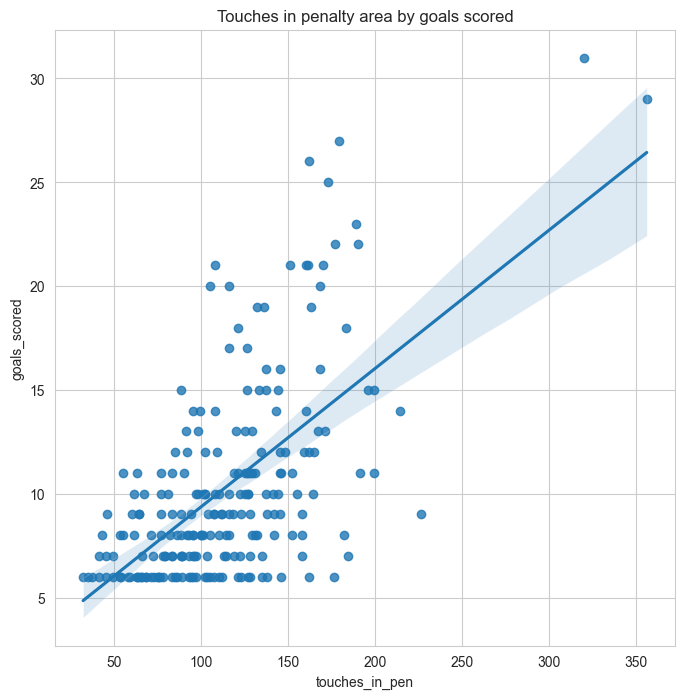

In [37]:
#Plotting touches in the penalty area by goals scored
plt.figure(figsize=(8, 8))
sns.regplot(filtered_striker_df, x="touches_in_pen", y="goals_scored")
plt.title("Touches in penalty area by goals scored")
plt.show()

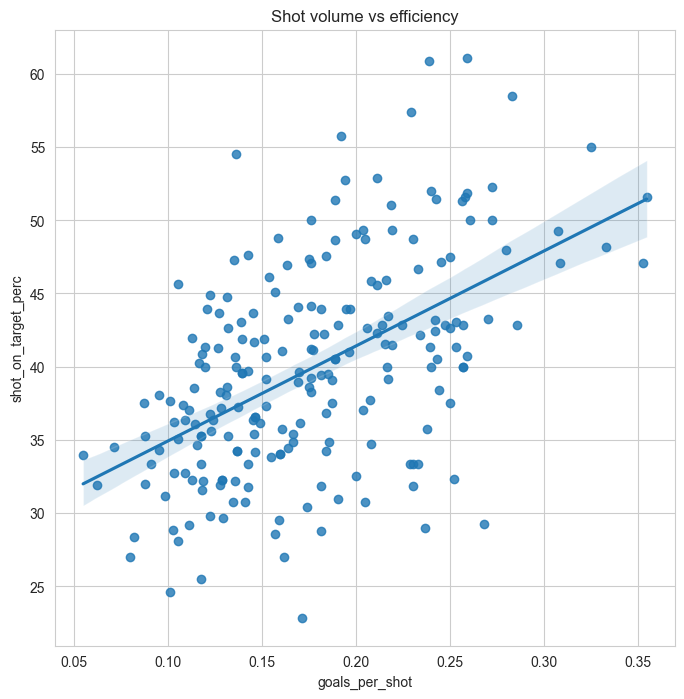

In [38]:
#Plotting goals per shot by shot on target percentage
plt.figure(figsize=(8, 8))
sns.regplot(filtered_striker_df, x="goals_per_shot", y="shot_on_target_perc")
plt.title("Shot volume vs efficiency")
plt.show()

In [39]:
#Creating a copy of the raw data before scaling
df_raw = filtered_striker_df.copy()

In [40]:
filtered_striker_df.to_csv("/Users/dan/PycharmProjects/Arsenal-Striker-Scouting/data/filtered_striker_df.csv")

From my analysis, it has become clear to me that we are looking for the outliers. This is where the elite players exist.

I will move on to clustering in an attempt to find these outliers.

First, I will create a feature shortlist based on my analysis.

Key features for modelling:
- progressive_runs
- touches_in_pen
- aerial_duels_won
- shots_on_target
- goals_per_sot
- goals_minus_exp_goals
- goals_per_90
- non_pen_exp_goals
- exp_assists

Move on to notebook 03 kmeans or move directly to 04 hdbscan for the final model.